### 머신러닝(50점) : 학생성적 예측
1. 시각화 포함 탐색적 자료분석을 시행하시오(EDA)

In [1]:
import pandas as pd
df=pd.read_csv("student_data.csv")
df.head()

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10


In [2]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


school        0
sex           0
paid          0
activities    0
famrel        1
freetime      2
goout         3
Dalc          4
Walc          2
health        4
absences      3
grade         0
G1            0
G2            0
dtype: int64

- y변수 정규성 검정(연속형일때)

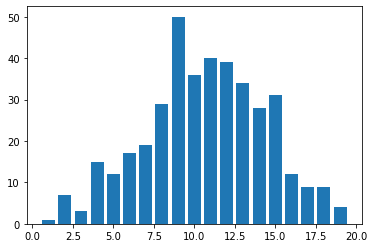

In [3]:
import matplotlib.pyplot as plt
grade=df['grade'].value_counts()
plt.bar(grade.index, grade.values, width=0.8, bottom=None, align='center')
plt.show()

종속변수는 1~19 사이의 수치형 변수이다. 변수는 대략적으로 정규분포를 따르는 것을 확인할 수 있다. 해당 종속변수의 값이 정규성을 띄고 다양한 값이 있으므로 다중 classification으로 예측하는 것보다는회귀분석을 진행하는 것이 좋을것으로 판단됨.

- 상관관계 그래프(히트맵으로 표현)
- 0.9 이상이면 다중공선성

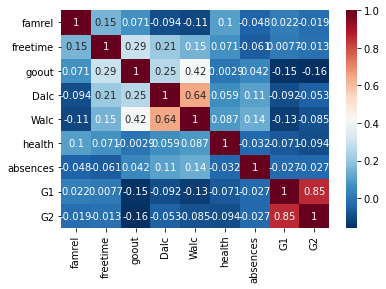

In [24]:
#변수들끼리의 상관성도 보지만, 종속변소와 독립변수의 상관관계도 확인
#수치형 변수중 상관관계가 큰 변수가 없다면 파생변수 활용
import seaborn as sns
df_cor=df.drop(columns='grade').corr(method='pearson')
sns.heatmap(df_cor, xticklabels=df_cor.columns, yticklabels=df_cor.columns, cmap='RdBu_r', annot=True)
plt.show()

- object에 대해서 막대그래프 plot

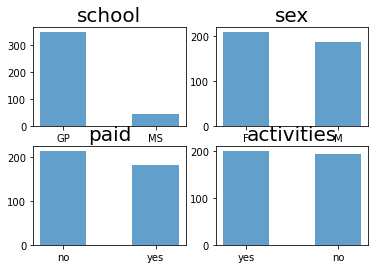

In [27]:
cols=['school', 'sex', 'paid', 'activities']

for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    plt.title(cols[i], fontsize=20)
    #연속형(히스토그램)
    #plt.hist(df[cols[i]], bins=20, color='b', alpha=0.7)
    #범주형(막대그래프)
    temp=df[cols[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
    plt.xticks(temp.keys())

↑독립변수 중 school의 경우 비대칭성이 있으므로 주의하여야 한다.

2. 결측치를 식별, 예측하는 두가지 방법을 쓰고 이를 선택한 이유를 설명.

In [28]:
df.isnull().sum()

school        0
sex           0
paid          0
activities    0
famrel        1
freetime      2
goout         3
Dalc          4
Walc          2
health        4
absences      3
grade         0
G1            0
G2            0
dtype: int64

In [29]:
# 수치형-KNN으로 결측치 대체
from sklearn.impute import KNNImputer
KNN_data=df.drop(columns=['school', 'sex', 'paid', 'activities'])

imputer=KNNImputer()
df_filled=imputer.fit_transform(KNN_data)
df_filled=pd.DataFrame(df_filled, columns=KNN_data.columns)
df_filled

array([[ 4.,  3.,  4., ...,  6.,  5.,  6.],
       [ 5.,  3.,  3., ...,  5.,  5.,  5.],
       [ 4.,  3.,  2., ...,  8.,  7.,  8.],
       ...,
       [ 5.,  5.,  3., ...,  8., 10.,  8.],
       [ 4.,  4.,  1., ..., 11., 11., 12.],
       [ 3.,  2.,  3., ...,  9.,  8.,  9.]])

In [31]:
df[KNN_data.columns]=df_filled
df

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6.0,5.0,6.0
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,5.0
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8.0,7.0,8.0
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,15.0,14.0
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9.0,6.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,yes,no,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9.0,9.0,9.0
391,MS,M,no,no,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15.0,14.0,16.0
392,MS,M,no,no,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8.0,10.0,8.0
393,MS,M,no,no,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11.0,11.0,12.0


In [32]:
df.isnull().sum()

school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
G1            0
G2            0
dtype: int64

3. 범주형 변수 인코딩

In [34]:
df=pd.get_dummies(df, drop_first=True)
df

,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2,school_MS,sex_M,paid_yes,activities_yes
0,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6.0,5.0,6.0,0,0,0,0
1,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,5.0,0,0,0,0
2,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8.0,7.0,8.0,0,0,1,0
3,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,15.0,14.0,0,0,1,1
4,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9.0,6.0,10.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9.0,9.0,9.0,1,1,1,0
391,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15.0,14.0,16.0,1,1,0,0
392,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8.0,10.0,8.0,1,1,0,0
393,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11.0,11.0,12.0,1,1,0,0


4. 데이터 분할

In [35]:
from sklearn.model_selection import train_test_split
X=df.drop('grade', axis=1)
y=df['grade']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=2022)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(276, 13)
(119, 13)
(276,)
(119,)


5. svm, xgboost, randomforest 3개 알고리즘의 공통점을 쓰고 학생성적 예측 분석에 적합한 알고리즘인지 설명하시오.

6. 세가지 모델 모두 모델링해보고 가장 적합한 알고리즘을 선택하시오. 이를 선택한 이유와 모델의 한계점, 보완 가능한 부분을 설명하고, 현업에서 주의할 점 등에 대해 기술하시오.

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [39]:
#정규화
scaler=StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled=pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [41]:
svr=SVR()
svr.fit(X_train_scaled, y_train)
pred=svr.predict(X_test_scaled)
mse=mean_squared_error(y_test, pred)
mse

2.198938766964979